In [1]:
'''Importing the reqired libraries'''

import numpy as np
import pandas as pd

import string

In [2]:
'''Data loading  and reading'''

df = pd.read_csv("1-P-3-ISEAR.csv",header=None)
df.head()

,0,1,2
0,0,joy,On days when I feel close to my partner and ot...
1,1,fear,Every time I imagine that someone I love or I ...
2,2,anger,When I had been obviously unjustly treated and...
3,3,sadness,When I think about the short time that we live...
4,4,disgust,At a gathering I found myself involuntarily si...


In [3]:
'''adding name to column'''

df.columns = ['sn','Target','Sentence']
df.drop('sn',inplace=True,axis =1)

In [4]:
df.head()

,Target,Sentence
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [5]:
'''Checking and removing duplicates if any '''

df.duplicated().sum()

df.drop_duplicates(inplace = True)


In [6]:
'''removing any puncuation if any exist in the datasets'''

def remove_punc(text):
    text = "".join([char for char in text if char not in string.punctuation and not char.isdigit()])
    return text


df['Sentence'] = df['Sentence'].apply(remove_punc)

In [7]:
df.head()

,Target,Sentence
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [8]:
'''A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) in Englsh , we have to remove those words while pre-processing '''

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:

def remove_stopwords(text):
    text = [w for w in text.split() if w not in stopwords.words('english')]
    return ' '.join(text)

df['Sentence'] = df['Sentence'].apply(remove_stopwords)

In [10]:
df.head()

,Target,Sentence
0,joy,On days I feel close partner friends When I fe...
1,fear,Every time I imagine someone I love I could co...
2,anger,When I obviously unjustly treated possibility ...
3,sadness,When I think short time live relate periods li...
4,disgust,At gathering I found involuntarily sitting nex...


In [11]:
'''During the process of Lemmatization the word changes into it's root word.'''
'''e.g travelling to travel '''

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    text = [lemmatizer.lemmatize(word,'v') for word in text.split()]
    return ' '.join(text)

df['Sentence'] = df['Sentence'].apply(lemmatize)

In [13]:
df.head()

,Target,Sentence
0,joy,On days I feel close partner friends When I fe...
1,fear,Every time I imagine someone I love I could co...
2,anger,When I obviously unjustly treat possibility el...
3,sadness,When I think short time live relate periods li...
4,disgust,At gather I find involuntarily sit next two pe...


In [14]:
'''Splitting the data for training and testing purpose'''

from sklearn.model_selection import train_test_split
X = df['Sentence']
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=10)


In [15]:
'''TfIdf is the techinique of transforming the the text to the mening ful vector format. It penalize the word that pops up too often and don't help much in predection. 
It rescales the frequency of the word that are common which makes the vector representaion more meaning full '''

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(X_train)
test_tfidf = tfidf.transform(X_test)

In [16]:
''' I am building the model from Logistic and Naive Bayes as both the algorithm can be used for the data classification.'''

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [17]:
'''Logistic Regression '''

lr = LogisticRegression(max_iter=1000)
lr.fit(train_tfidf,y_train)
lr.score(train_tfidf, y_train), lr.score(test_tfidf, y_test)

(0.8633288227334236, 0.5862068965517241)

In [18]:
'''Naive Bayes'''

nb = MultinomialNB()
nb.fit(train_tfidf,y_train)
nb.score(train_tfidf, y_train), nb.score(test_tfidf, y_test)

(0.8398173207036536, 0.5706558485463151)

In [19]:
'''Predecting of he data'''

test_sentence = ['i am very disappointed at you']
test_sentence = tfidf.transform(test_sentence)

lr.predict(test_sentence)


array(['sadness'], dtype=object)

In [20]:
'''Getting Predection Probablity using Naive Bayes'''

lr_emotions = lr.predict_proba(test_sentence)
lr_datas = lr.classes_

lr_df = pd.DataFrame()
lr_df['Emotion'] = lr_datas
lr_df['emotion_propb'] = lr_emotions.T

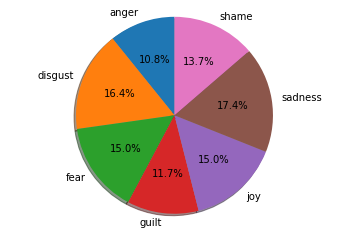

In [22]:
'''pie chart for prediction probality using  linear regression'''

import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(lr_df['emotion_propb'], labels=lr_df['Emotion'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [23]:
nb_emotion = nb.predict_proba(test_sentence)
nb_datas = nb.classes_

nb_datas

array(['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame'],
      dtype='<U7')

In [24]:
#prediction prob 
nb_emotions = lr.predict_proba(test_sentence)
nb_datas = lr.classes_

nb_df = pd.DataFrame()
nb_df['Emotion'] = nb_datas
nb_df['emotion_propb'] = nb_emotions.T

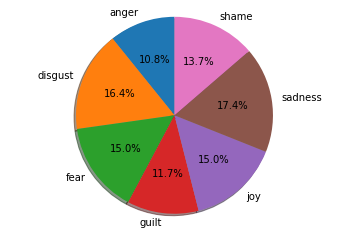

In [25]:
'''pie chart for prediction probality using  Naive Bayes regression'''


fig1, ax1 = plt.subplots()
ax1.pie(lr_df['emotion_propb'], labels=lr_df['Emotion'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()